In [1]:
import ptc_twiss.madx_configuration as twiss_conf
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_twiss.particles_trajectory_generator as twiss_ptg
import ptc_track.madx_configuration as track_conf
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import ptc_track.particles_trajectory_generator as track_ptg
import visualization.optics_parameter_visualisation as plotter
import approximator.runner as app_runner
import approximator.optics_parameters as app_op
import approximator.matrix_indexes as app_indexes
import approximator.particles_trajectory_generator as app_ptg
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import comparators.transport as transport
import models.train_model as tram
import models.approximator as stub_app
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/00


In [2]:
sns.set_style("whitegrid")

In [3]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_conf.TwissConfiguration(path_to_script, s)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 0
track_configuration = track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [6]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_total.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [7]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_120.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_120 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [8]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_140.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_140 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [9]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_160.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_160 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [10]:
# Parameters of training
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

home = "/eos/user/r/rmucha/SWAN_projects"
prototype_approximator, in_mat, out_mat = tram.train_prototype(bunch_configuration, track_configuration, home)

130 terms removed
17 terms removed
27 terms removed
107 terms removed


In [10]:
title_sufix = r"2017 matched, $\xi=0$, set delta p and XA"
transporter1 = "ptc_twiss"
transporter2 = "ptc_track"
transporter3 = "app_total"
transporter4 = "app_120"
transporter5 = "app_140"
transporter6 = "app_160"
transporter7 = "prototype_total"

In [11]:
transporters = {
#     transporter1: (twiss_ptg.transport, twiss_configuration, twiss_indexes.ptc_twiss),
    transporter2: (track_ptg.transport, track_configuration, track_indexes.ptc_track),
    transporter3: (app_ptg.transport, approximator, app_indexes.indexes),
#     transporter4: (app_ptg.transport, approximator_120, app_indexes.indexes),
#     transporter5: (app_ptg.transport, approximator_140, app_indexes.indexes),
#     transporter6: (app_ptg.transport, approximator_160, app_indexes.indexes)
#     transporter7: (app_ptg.transport, prototype_approximator, app_indexes.indexes)
}

In [12]:
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wo

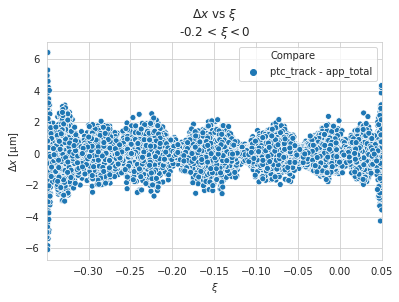

In [13]:
transport.compare(bunch_configuration, transporters, "x", "pt", title_sufix=r"-0.2 < $\xi < 0$", plot_function=sns.scatterplot) #scatterplot don't work!!!

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



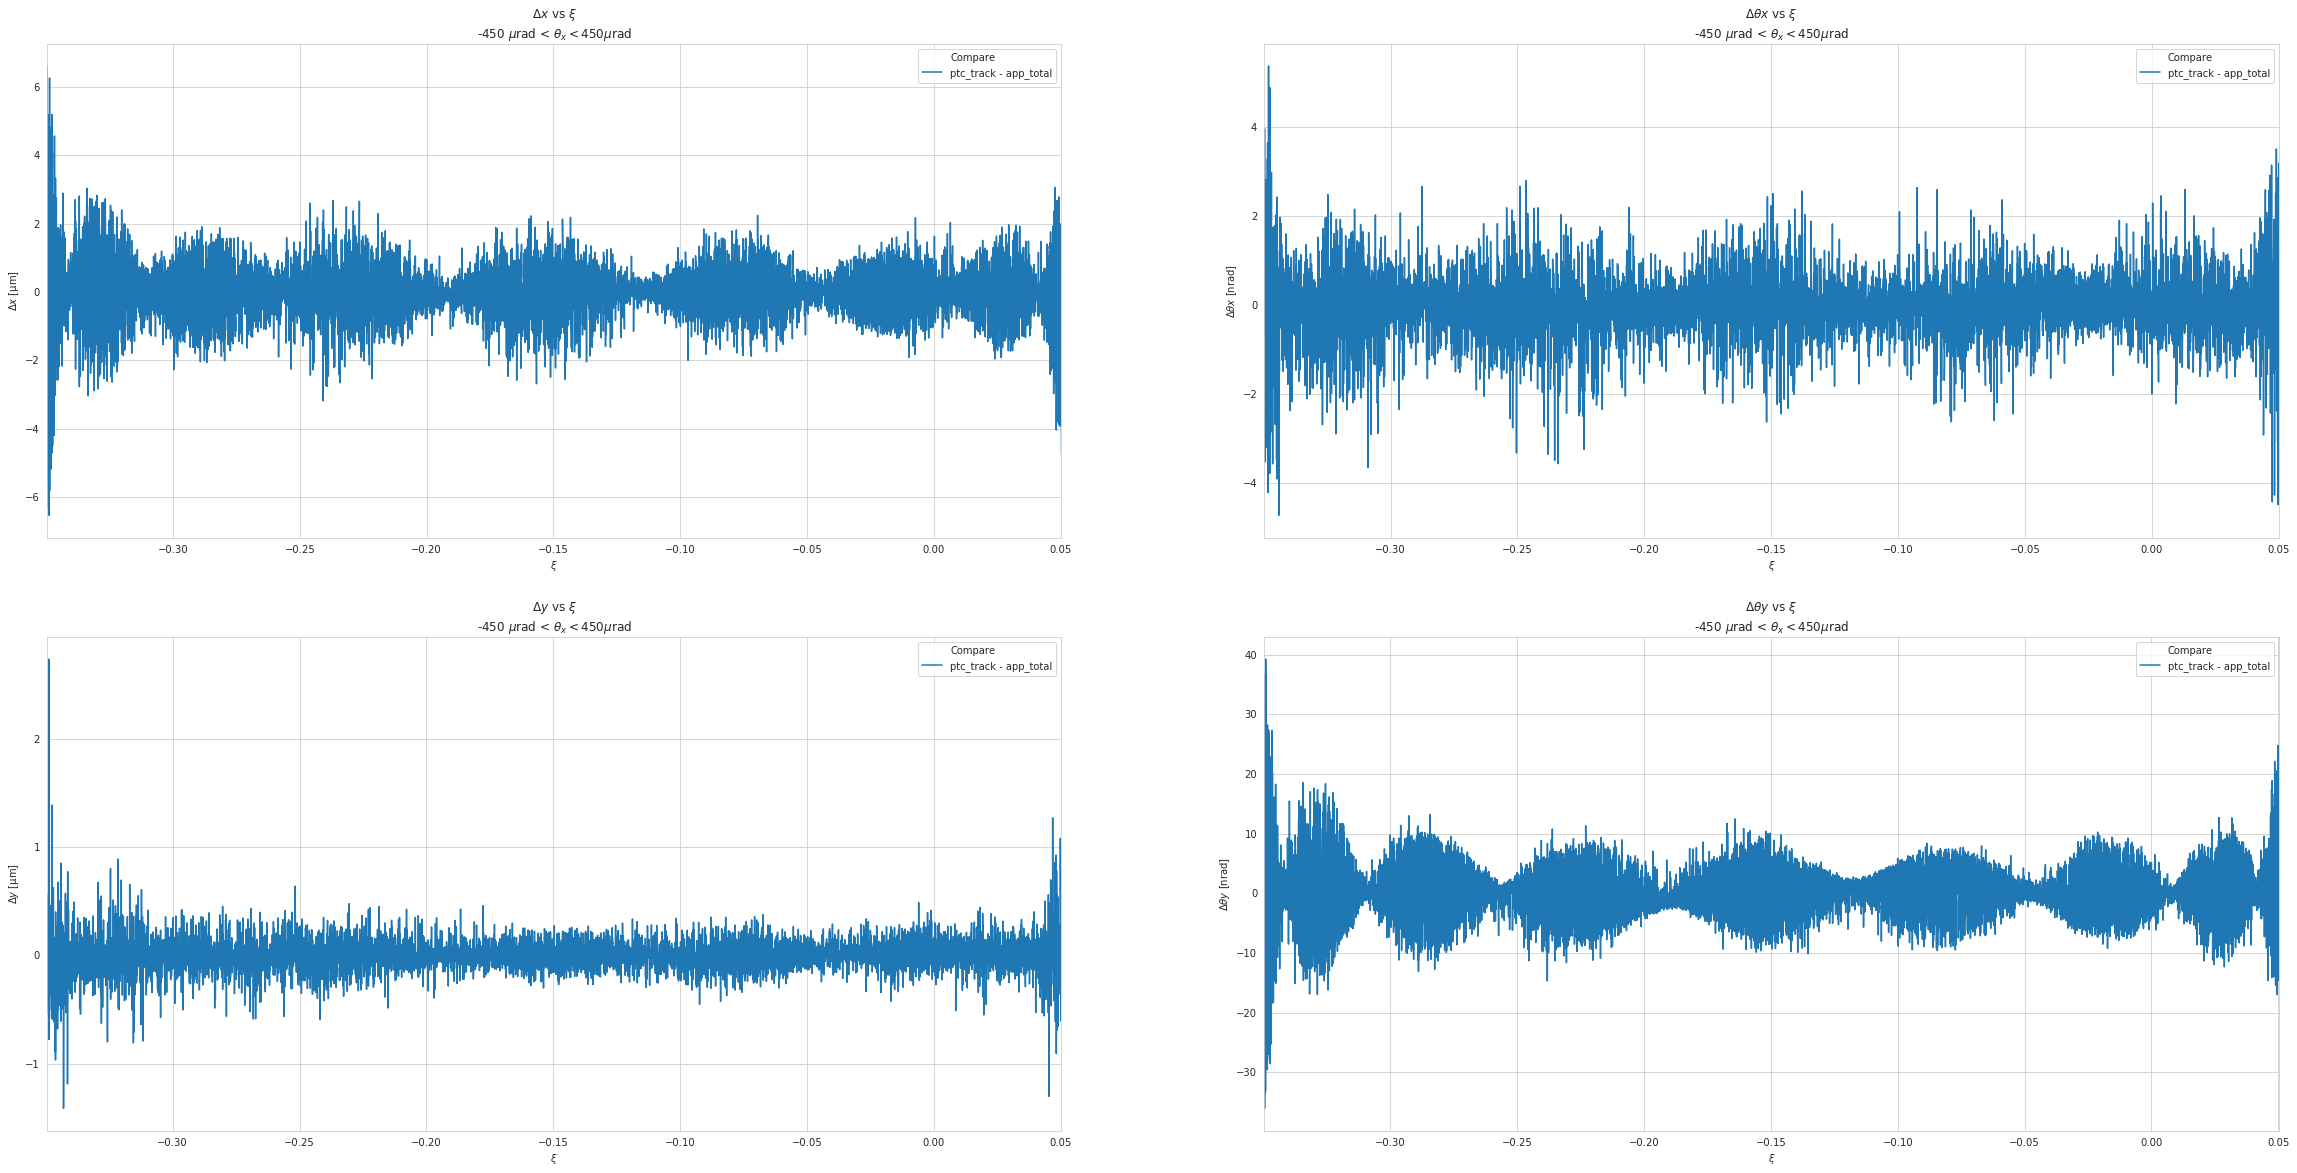

In [14]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(40,20)

title_sufix = r"-450 $\mu$rad < $\theta_x < 450 \mu$rad"

transport.compare(bunch_configuration, transporters, "x", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=0, plot_y_pos=0) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "theta x", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=0, plot_y_pos=1) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "y", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=1, plot_y_pos=0) #scatterplot don't work!!!
transport.compare(bunch_configuration, transporters, "theta y", "pt", title_sufix=title_sufix, plot_axes=axes, plot_x_pos=1, plot_y_pos=1) #scatterplot don't work!!!

In [15]:
sns

import pandas as pd

In [16]:
frame = pd.DataFrame({"y": in_mat[2], "pt": in_mat[4]})

NameError: name 'in_mat' is not defined

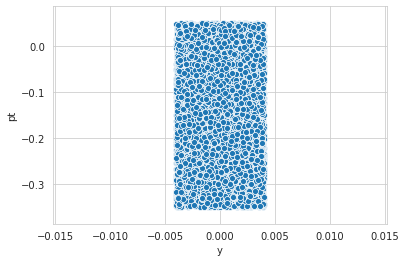

In [19]:
sns.scatterplot(data=frame, x = "y", y="pt")

In [20]:
import numpy as np
print(np.min(in_mat[0]))
print(np.max(in_mat[0]))

-0.003999777355
0.003999410189


In [21]:
frame_out = pd.DataFrame({"x": out_mat[0], "pt": out_mat[4]})

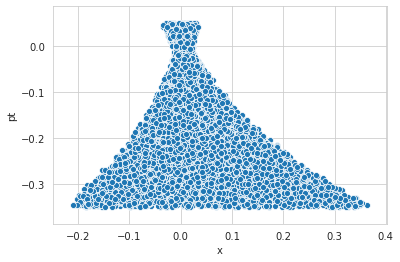

In [22]:
sns.scatterplot(data=frame_out, x = "x", y="pt")

In [23]:
res_seg = app_ptg.transport(prototype_approximator, in_mat.T)

In [24]:
frame_out_t = pd.DataFrame({"x": res_seg["end"].T[0], "pt": res_seg["end"].T[4]})

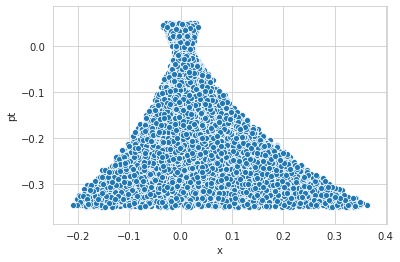

In [25]:
sns.scatterplot(data=frame_out_t, x = "x", y="pt")

In [26]:
diff_x = res_seg["end"].T[0] - out_mat[0]

In [27]:
scaled_diff_x = diff_x * 1e6

Text(0.5, 0, '$\\Delta$x [$\\mu$m]')

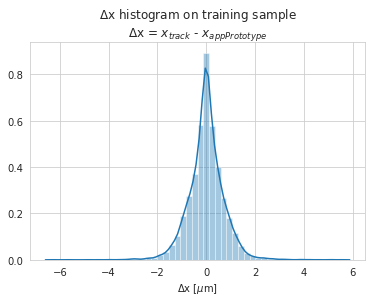

In [28]:
axes = sns.distplot(scaled_diff_x)
axes.set_title(r"$\Delta$x histogram on training sample" + "\n" + "$\Delta$x = $x_{track}$ - $x_{appPrototype}$")
axes.set_xlabel(r"$\Delta$x [$\mu$m]")

In [17]:
import data.particles_generator as pg
new_input = pg.generate_particles_randomly(bunch_configuration)

In [18]:
new_input.shape

(12000, 5)

In [19]:
track_segm_n = track_ptg.transport(track_configuration, new_input)

In [20]:
res_seg_n = app_ptg.transport(approximator, new_input)

Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wołowinę!
Zaczyna się
Przygotować katapulty!
Mam nadzieję, że oni lubią wo

In [21]:
app_n_end = res_seg_n["end"]
tra_n_end = track_segm_n["end"]

In [22]:
track_x_new = tra_n_end.T[track_indexes.ptc_track["x"]]
track_pt_new = tra_n_end.T[track_indexes.ptc_track["pt"]]

In [23]:
app_x_new = app_n_end.T[app_indexes.indexes["x"]]
app_pt_new = app_n_end.T[app_indexes.indexes["pt"]]

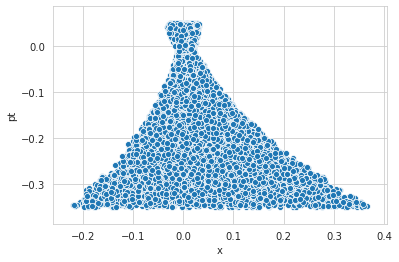

In [24]:
frame_out_t = pd.DataFrame({"x": app_x_new, "pt": app_pt_new})
sns.scatterplot(data=frame_out_t, x = "x", y="pt")

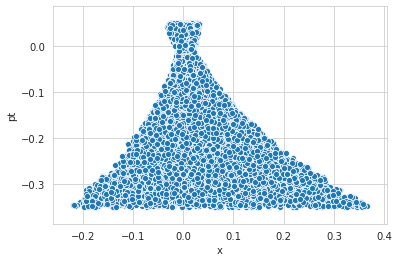

In [25]:
frame_out_t = pd.DataFrame({"x": track_x_new, "pt": track_pt_new})
sns.scatterplot(data=frame_out_t, x = "x", y="pt")

In [26]:
diff_x_new = track_x_new - app_x_new

In [27]:
scaled_diff_x_new = diff_x_new * 1e6

Text(0.5, 0, '$\\Delta$x [$\\mu$m]')

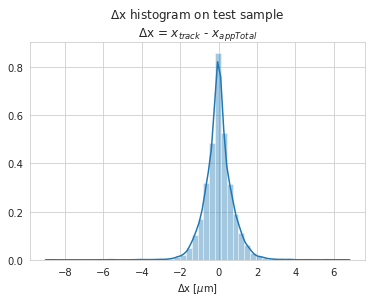

In [29]:
axes = sns.distplot(scaled_diff_x_new)
axes.set_title(r"$\Delta$x histogram on test sample" + "\n" + "$\Delta$x = $x_{track}$ - $x_{appTotal}$")
axes.set_xlabel(r"$\Delta$x [$\mu$m]")

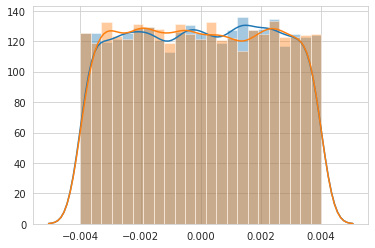

In [41]:
sns.distplot(in_mat[0])
sns.distplot(new_input.T[0])

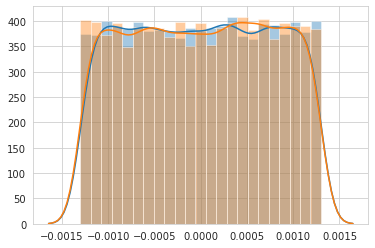

In [42]:
sns.distplot(in_mat[1])
sns.distplot(new_input.T[1])

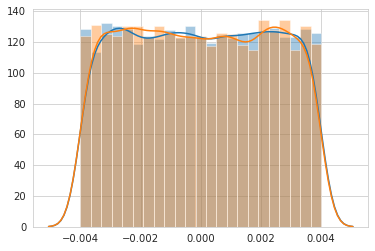

In [43]:
sns.distplot(in_mat[2])
sns.distplot(new_input.T[2])

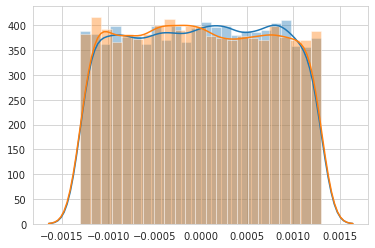

In [44]:
sns.distplot(in_mat[3])
sns.distplot(new_input.T[3])

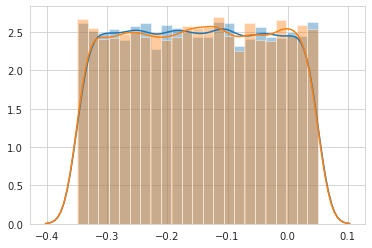

In [45]:
sns.distplot(in_mat[4])
sns.distplot(new_input.T[4])

In [31]:
app_n_end.dtype

dtype('float64')